<a href="https://colab.research.google.com/github/ali-rn/DS2002F24/blob/main/Nilforoush_Ali_HW_API_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Takes user input for a stock (using the Ticker Symbol): IE with the input() command
2. You will display back the user: Ticker Name, Full Name of the Stock, Current Market
Price, Target Mean Price, 52 week high and 52 week low. Also, output 5 of the current
trending stock.
3. Put that data in a DataFrame and then store that to a CSV file
4. Handle Errors (IE, the stock doesn’t exist and/or the API is not returning information)

In [45]:
import json
import pandas as pd
import requests

def obtain_data(stock):
  url = f'https://yfapi.net/v6/finance/quote?region=US&lang=en&symbols={stock}'
  querystring = {"symbols": stock}
  headers = {
    'x-api-key': apikey
    }
  response = requests.request("GET", url, headers=headers, params=querystring)
  stock_json = response.json()
  data = {
    "Ticker": stock_json['quoteResponse']['result'][0]["symbol"],
    "Name": stock_json['quoteResponse']['result'][0]['longName'],
    "Price": stock_json['quoteResponse']['result'][0]["regularMarketPrice"],
    "Target Mean Price": stock_json['quoteResponse']['result'][0]["fiftyDayAverage"],
    "52 Week High": stock_json['quoteResponse']['result'][0]["fiftyTwoWeekHigh"],
    "52 Week Low": stock_json['quoteResponse']['result'][0]["fiftyTwoWeekLow"],
  }
  return data

# 1. Take user input for stock (using the Ticker Symbol)
stock = input("Insert ticker symbol of stock: ").strip()

# 2. display back to user: Ticker Name, Full Name of the Stock, Current Market Price, Target Mean Price, 52 week high & low
apikey="redacted"

try:
    data = obtain_data(stock)

    if not data:
        raise ValueError("No data returned for the specified stock.")

    print(data)

except Exception as e:
    print(f"Error obtaining stock data: {e}")
    data = {}

# Output 5 of the trending stocks
url = 'https://yfapi.net/v1/finance/trending/US'
querystring = {"region": "US"}
headers = {'x-api-key': apikey}

try:
    response = requests.get(url, headers=headers, params=querystring)
    response.raise_for_status()
    stock_json2 = response.json()

    if 'finance' not in stock_json2 or 'result' not in stock_json2['finance'] or not stock_json2['finance']['result']:
        raise ValueError("No trending stock data available.")

    print("\n5 Trending Stocks: \n" + stock_json2['finance']['result'][0]["quotes"][3]["symbol"] + "\n"
      + stock_json2['finance']['result'][0]["quotes"][7]["symbol"] + "\n"
      + stock_json2['finance']['result'][0]["quotes"][10]["symbol"] + "\n"
      + stock_json2['finance']['result'][0]["quotes"][12]["symbol"] + "\n"
      + stock_json2['finance']['result'][0]["quotes"][17]["symbol"])

    data1 = obtain_data(stock_json2['finance']['result'][0]["quotes"][3]["symbol"])
    data2 = obtain_data(stock_json2['finance']['result'][0]["quotes"][7]["symbol"])
    data3 = obtain_data(stock_json2['finance']['result'][0]["quotes"][10]["symbol"])
    data4 = obtain_data(stock_json2['finance']['result'][0]["quotes"][12]["symbol"])
    data5 = obtain_data(stock_json2['finance']['result'][0]["quotes"][17]["symbol"])
    print(data1)
    print(data2)
    print(data3)
    print(data4)
    print(data5)

except requests.exceptions.RequestException as e:
    print(f"Error fetching trending stocks: {e}")

# 3. Put data into a DataFrame and then store into a CSV
df = pd.DataFrame([data, data1, data2, data3, data4, data5])
df.to_csv("stock_data.csv", index=False)

# 4. handle errors (i.e., the stock doesn’t exist and/or the API is not returning information)

Insert ticker symbol of stock: AAPL
{'Ticker': 'AAPL', 'Name': 'Apple Inc.', 'Price': 227.725, 'Target Mean Price': 222.0918, '52 Week High': 237.23, '52 Week Low': 164.08}

5 Trending Stocks: 
AMSC
PWR
SNAP
NIO
EME
{'Ticker': 'AMSC', 'Name': 'American Superconductor Corporation', 'Price': 22.98, 'Target Mean Price': 21.8456, '52 Week High': 32.7, '52 Week Low': 5.78}
{'Ticker': 'PWR', 'Name': 'Quanta Services, Inc.', 'Price': 296.74, 'Target Mean Price': 265.855, '52 Week High': 306.5, '52 Week Low': 153.74}
{'Ticker': 'SNAP', 'Name': 'Snap Inc.', 'Price': 10.87, 'Target Mean Price': 10.2164, '52 Week High': 17.9, '52 Week Low': 8.29}
{'Ticker': 'NIO', 'Name': 'NIO Inc.', 'Price': 6.52, 'Target Mean Price': 4.5444, '52 Week High': 9.57, '52 Week Low': 3.61}
{'Ticker': 'EME', 'Name': 'EMCOR Group, Inc.', 'Price': 427.09, 'Target Mean Price': 378.5068, '52 Week High': 443.96, '52 Week Low': 191.5}


In [46]:
df

,Ticker,Name,Price,Target Mean Price,52 Week High,52 Week Low
0,AAPL,Apple Inc.,227.725,222.0918,237.23,164.08
1,AMSC,American Superconductor Corporation,22.980,21.8456,32.70,5.78
2,PWR,"Quanta Services, Inc.",296.740,265.8550,306.50,153.74
3,SNAP,Snap Inc.,10.870,10.2164,17.90,8.29
4,NIO,NIO Inc.,6.520,4.5444,9.57,3.61
5,EME,"EMCOR Group, Inc.",427.090,378.5068,443.96,191.50


Insert ticker symbol of stock: NVDA


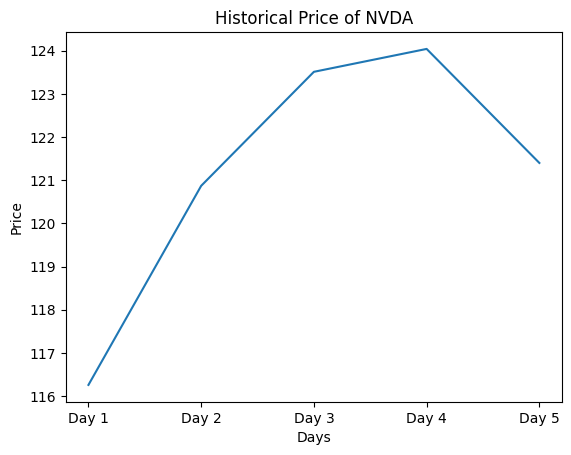

In [58]:
# bonus: Use MatPlotLib to chart the historical price of a stock price’s highest value over the past 5 days
import matplotlib.pyplot as plt
import numpy as np

stock = input("Insert ticker symbol of stock: ").strip()

url = f'https://yfapi.net/v8/finance/spark?interval=1d&range=5d&symbols={stock}'

querystring = {"symbols": stock}
headers = {
  'x-api-key': apikey
  }
response = requests.request("GET", url, headers=headers, params=querystring)
stock_json = response.json()
data = {
    "Day 1": stock_json[stock]['close'][0],
    "Day 2": stock_json[stock]['close'][1],
    "Day 3": stock_json[stock]['close'][2],
    "Day 4": stock_json[stock]['close'][3],
    "Day 5": stock_json[stock]['close'][4]
}

days = np.linspace(0,1,5)

plt.plot(days, data.values())
plt.xticks(days, data.keys())
plt.xlabel("Days")
plt.ylabel("Price")
plt.title(f"Historical Price of {stock}")
plt.show()